In [21]:
%reset -f

# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [2]:
%load_ext autoreload
%autoreload 2

In [140]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

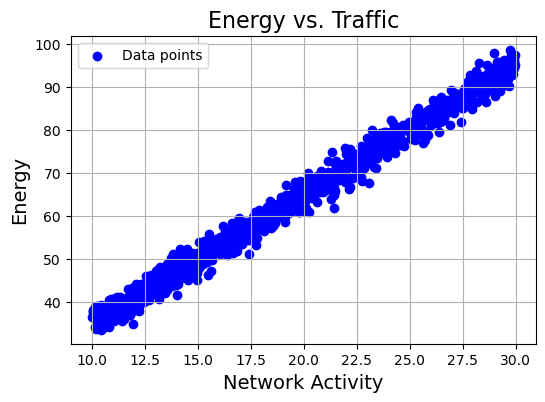

In [112]:
# Data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [142]:
lr = LinearRegression(epochs=50)

lr.fit(data['Net_Activity'], data['Energy'])

weights, bias = lr.get_params()
losses = lr._get_losses()
print("Weights: ", weights)
print("Bias: ", bias)

y_hat = lr.predict(data['Net_Activity'])

Weights:  [[3.0418114]]
Bias:  4.174358354127286


In [136]:
y = data['Energy']
y = np.reshape(y, (y.shape[0],1))
np.mean((y - y_hat)**2)
losses = lr._get_losses()

In [137]:
from sklearn.linear_model import LinearRegression
X = data['Net_Activity'][:].to_frame()
y = data['Energy'][:].to_frame()
reg = LinearRegression().fit(X, y)
reg.score(X, y)
print(reg.coef_)
print(reg.intercept_)

[[3.00869655]]
[4.89170478]


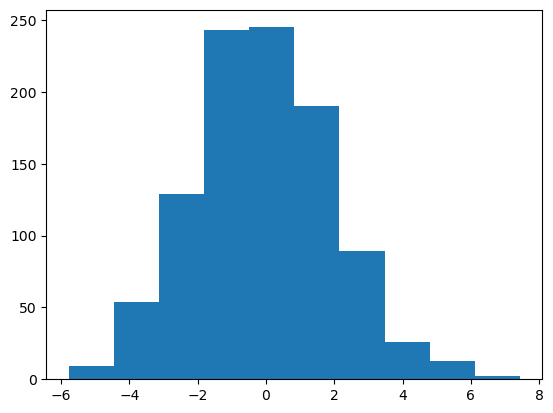

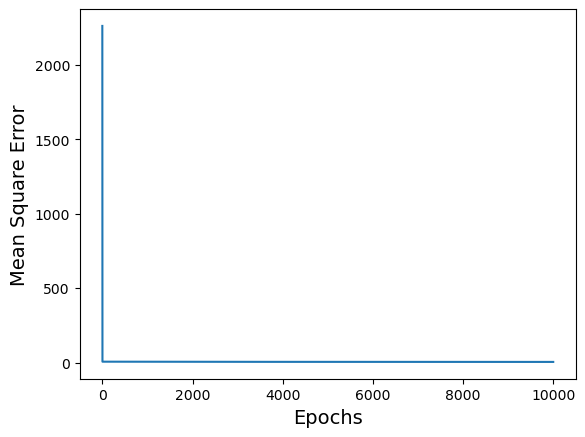

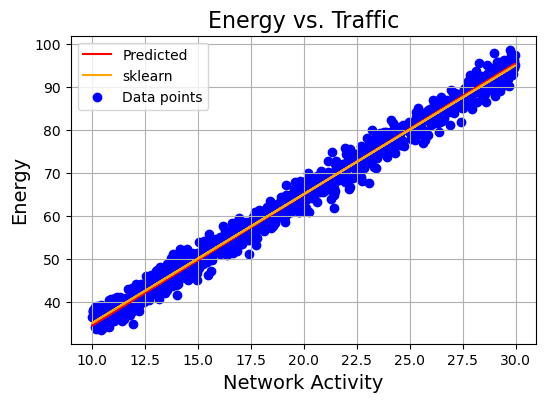

In [138]:
error = y_hat.flatten() - data['Energy']
plt.hist(error)
plt.show()

plt.plot(range(10000), lr._get_losses())
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Mean Square Error', fontsize=14)
plt.show()

y_hat2 = reg.predict(X)
plt.figure(figsize=(6, 4))
plt.plot(data['Net_Activity'], y_hat, c='red', label='Predicted')
plt.plot(data['Net_Activity'], y_hat2, c='orange', label='sklearn')
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()


## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [3]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [17]:
from logistic_regression import LogisticRegression, accuracy 
pd.options.mode.chained_assignment = None

In [8]:
epochs = 200
lr = LogisticRegression(learning_rate=0.001,epochs=epochs,threshold = 0.5, regularization=0.3)

lr.fit(train[['x0', 'x1']], train['y'])

y_hat = lr.predict(train[['x0', 'x1']])


In [360]:
loss = lr._get_losses()
accuracies = lr._get_accuracies()

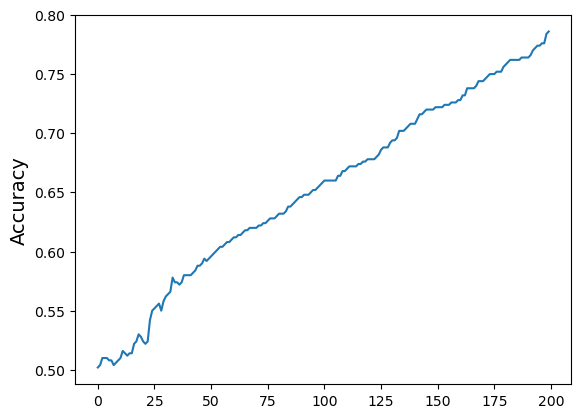

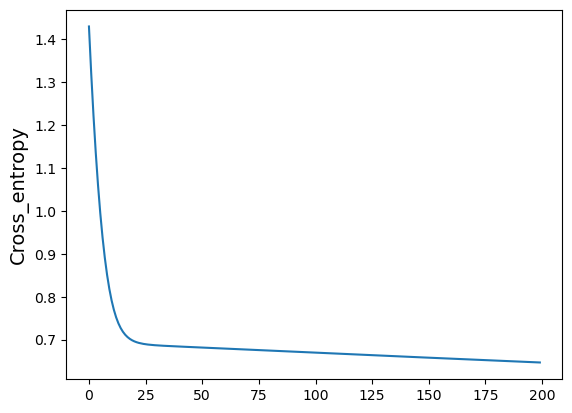

In [361]:
plt.plot(range(epochs), accuracies, label='accuracy')
plt.ylabel('Accuracy', fontsize=14)
plt.show()

plt.plot(range(epochs), loss, label='loss')
plt.ylabel('Cross_entropy', fontsize=14)
plt.show()

In [11]:
y_test = lr.predict(test[['x0', 'x1']])
acc = accuracy(test['y'], y_test)
print('Test accuracy: ', acc)

Test accuracy:  0.496


The test accuracy without any feature engineering has it come down to choice whether or not to classify decisions. To better see what is happening, plot the features:

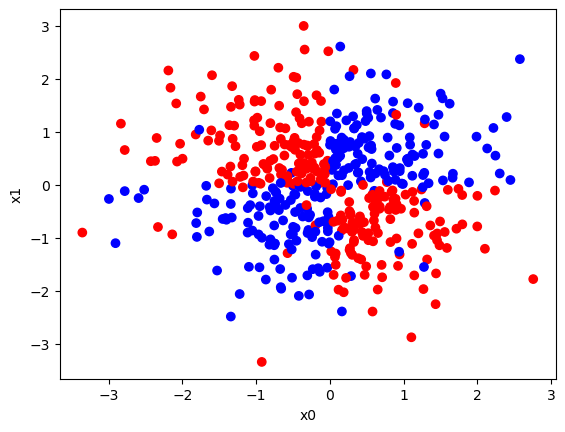

In [15]:
plt.scatter(train['x0'], train['x1'], c = train['y'], cmap = 'bwr')
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

# 3.a. Bad initial performance
It can be observed here, red (binary decision 1) and blue (binary decision 0), that it is not a linear relationship, making it difficult to fit and classify, since the logistic regression is still using a linear model to send to a sigmoid function. Hence, the two features provided are a bad indicator and leads to overfitting to the training data and is not able to generalize when seeing new data.
However, it is possible to observe that there is some relationship between the two features and decison made (target).
Create a new feature that can represent the target value better. We can observe from the scatter plot that
the target value is not linear, but is separated into quadrants. When multiplying the existing features, a positive value gives target value 0 and a negative value gives target value 1
a new feature can be created from this and sent to the classifier.

In [18]:
train['new_feat'] = train['x0']*train['x1']
epochs = 30
lr = LogisticRegression(learning_rate=0.01,epochs=epochs,threshold = 0.5)

lr.fit(train['new_feat'], train['y'])

y_hat = lr.predict(train['new_feat'])

acc_new_feat = accuracy(train['y'], y_hat)
print("Training set accuracy:", acc_new_feat)


Training set accuracy: 0.956


The training accuracy doesn't really indicate anything, just how well the model is fitting to the training set and not any generalization. The cross-entropy curve show that loss is decreasing and going the correct direction.

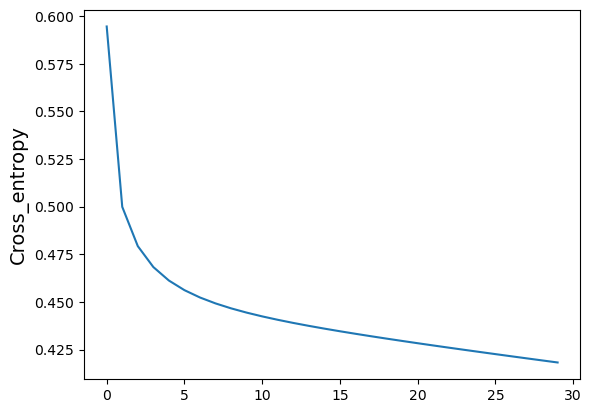

In [13]:
loss = lr._get_losses()
plt.plot(range(epochs), loss, label='loss')
plt.ylabel('Cross_entropy', fontsize=14)
plt.show()

In [19]:
test['new_feat'] = test['x0']*test['x1']
y_test = lr.predict(test['new_feat'])
acc_test = accuracy(test['y'], y_test)
print('Test set accuracy:', acc_test)

Test set accuracy: 0.902


By engineering a new feature we now have a better model and achieve a test accuracy of 90.2%.

# 3.B. What is a model inductive bias and why is it important?
The model inductive bias indicates how well the model can generalize to unseen data or how well an algorithm chooses to learn one pattern over another. In other words, has the model managed to extract some info that can generalize? The problem with only training on training data is overfitting. The model is only memorizing the training data. 
Ways on improving and avoiding underfitting can be regularization, minimizing features that explain the relationshop. In this case, the two features didn't explain anything by themselves, but it was possible to engineer a new feature that better explain the relationship between the feature and target value. It was then possible to reduce the number of features and improve inductive bias of the model.

# 3.C Using decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Training set accuracy for tree classifier: 1.0


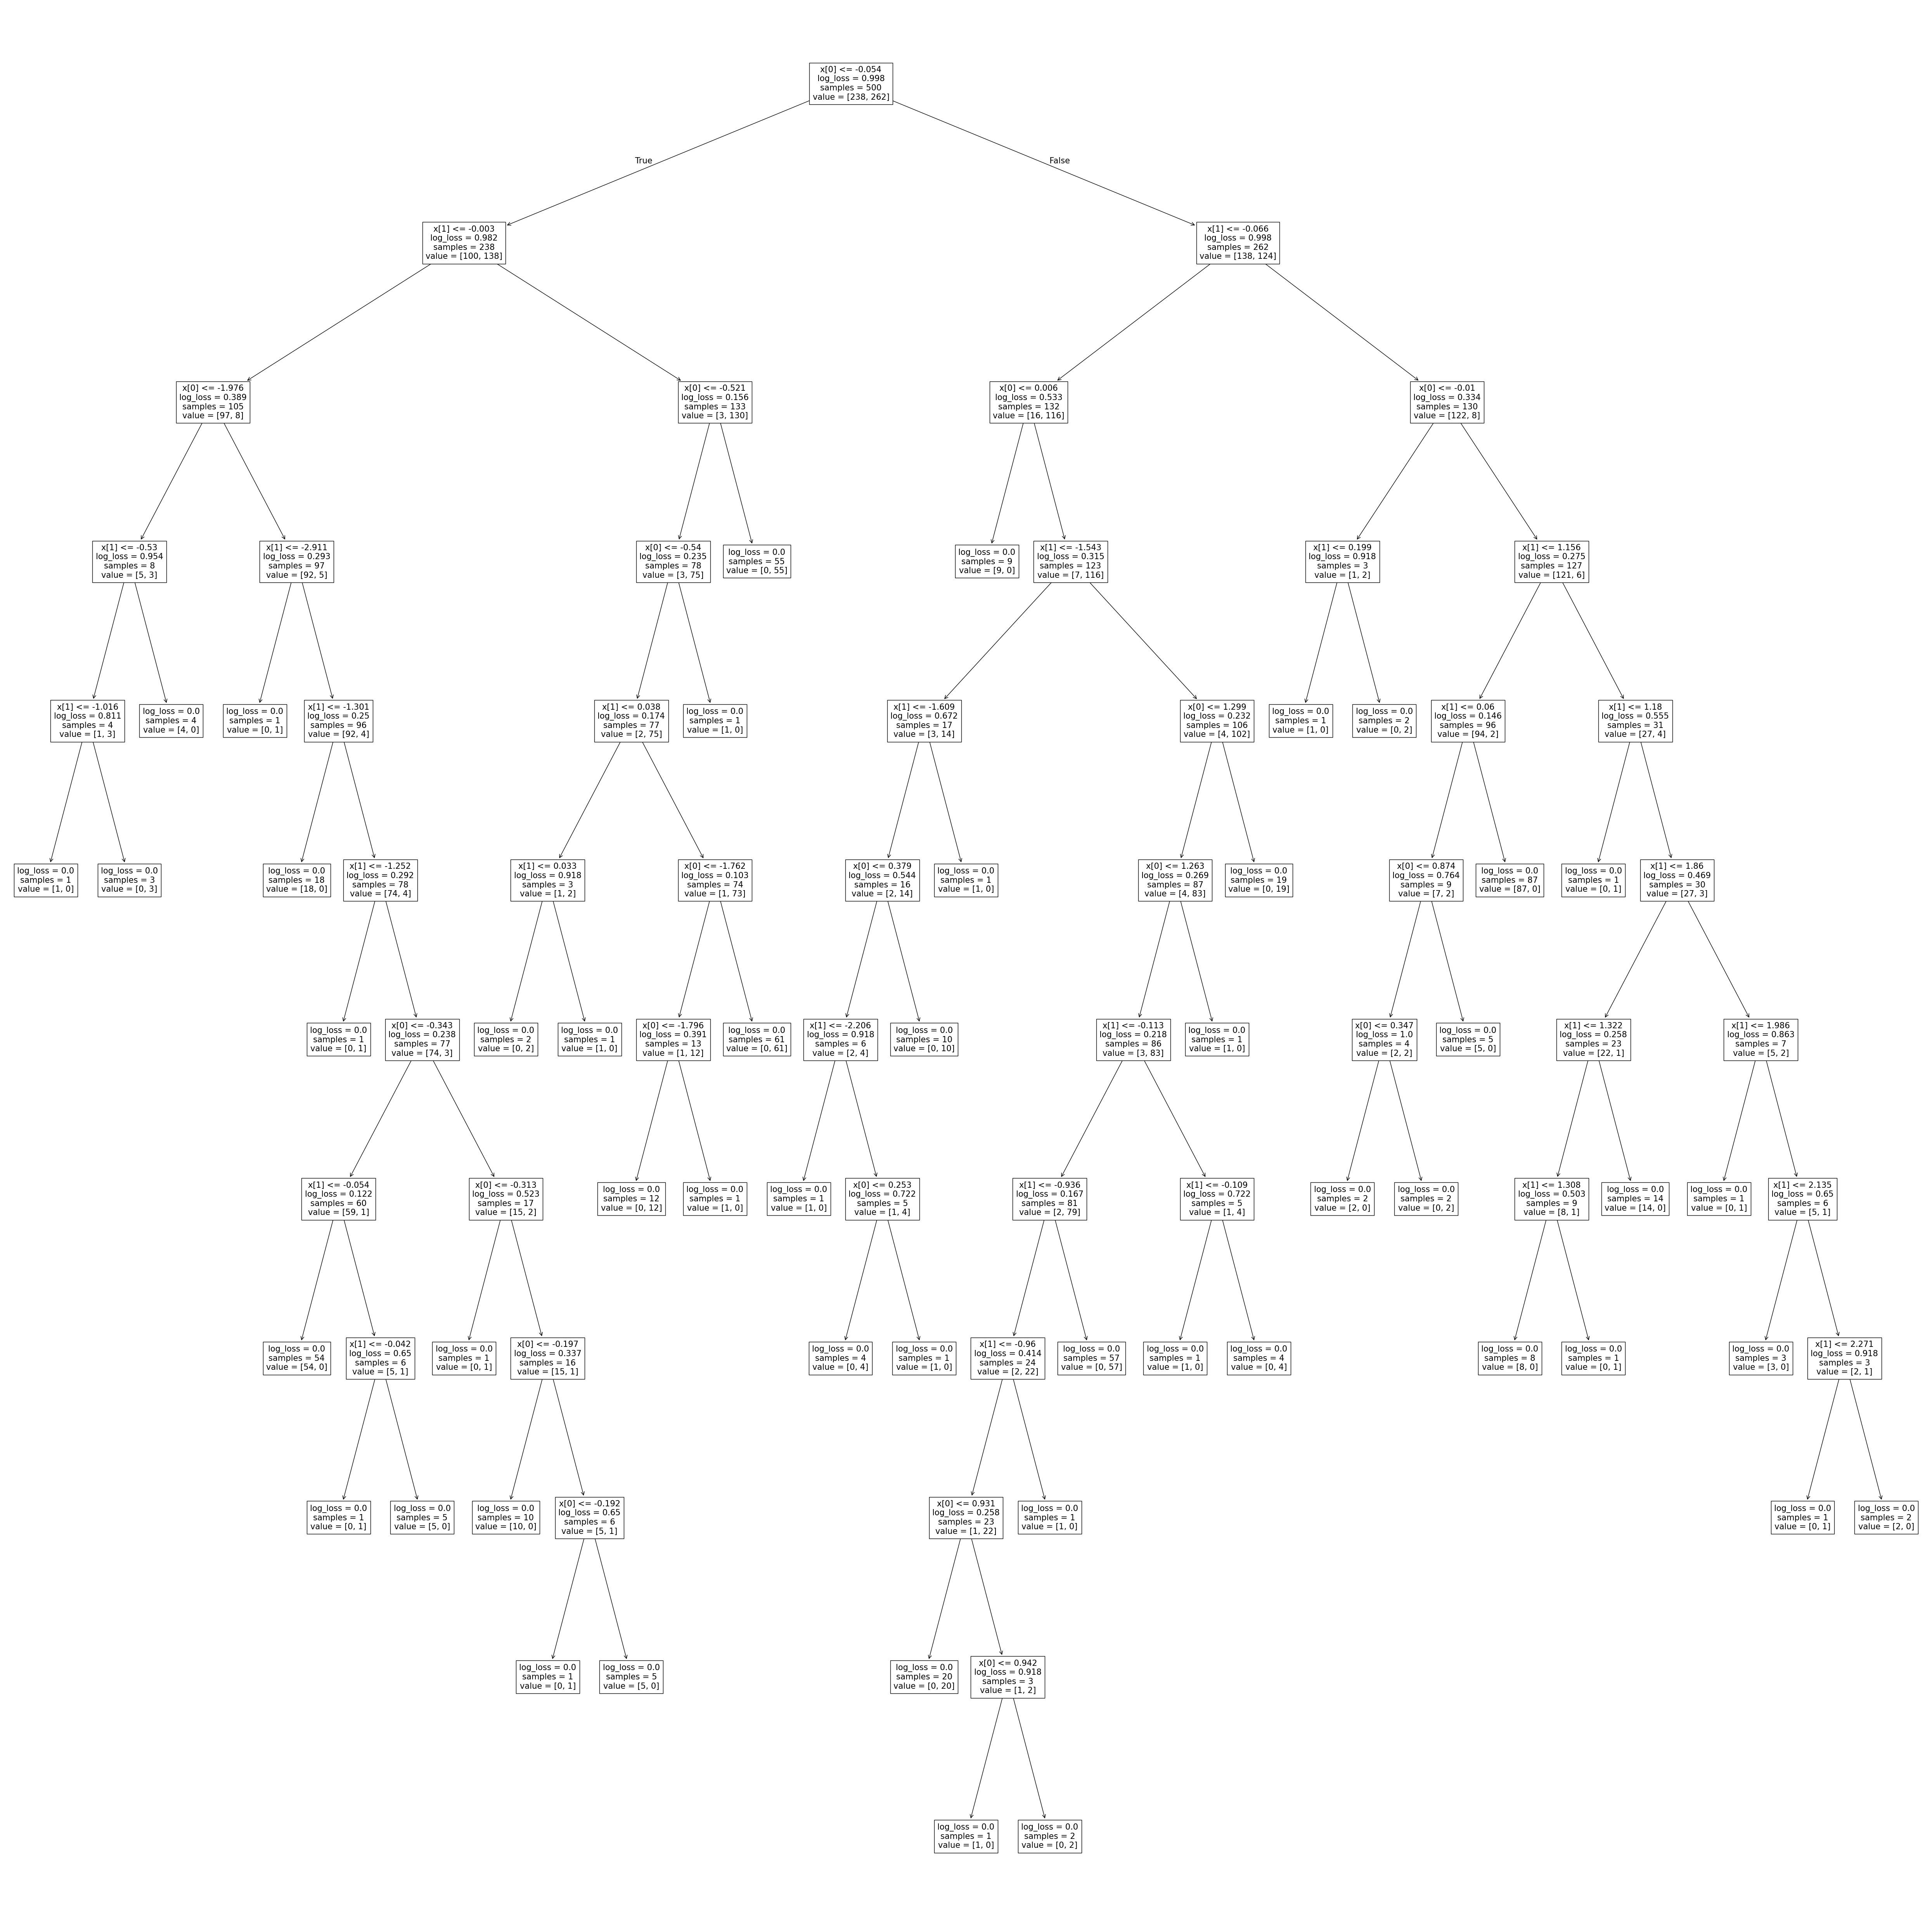

In [449]:
clf = DecisionTreeClassifier(criterion='log_loss',random_state=0)
clf.fit(train[['x0', 'x1']], train['y'])
y_hat = clf.predict(train[['x0', 'x1']])

acc_train = accuracy(train['y'], y_hat)
print("Training set accuracy for tree classifier:", acc_train)
plt.figure(figsize=(64, 64))
tree.plot_tree(clf)
plt.show()


In [450]:
y_test = clf.predict(test[['x0', 'x1']])
acc_test = accuracy(test['y'], y_test)
print("Test set accuracy for tree classifier:", acc_test)

Test set accuracy for tree classifier: 0.892


The decision tree manages to solve the problem and get us a good test accuracy without feature engineering and it is one of the advantages of decision trees. It usually requires no pre-processing of the data. However, the disadvantage is that it is notorious for overfitting and does not generalize well if new data come in that does not fit into very strictly defined range of values. It could probably have both ways in terms of solving the problem. In this case, the data is relatively simple so it manages to solve the problem. 
Also, no tuning was done to the hyperparameters of decision tree function. It is possible that a combination of bad hyperparameters could have lead to not solving the problem.

# 3.D. Plot ROC-curve

In [452]:
from sklearn import metrics

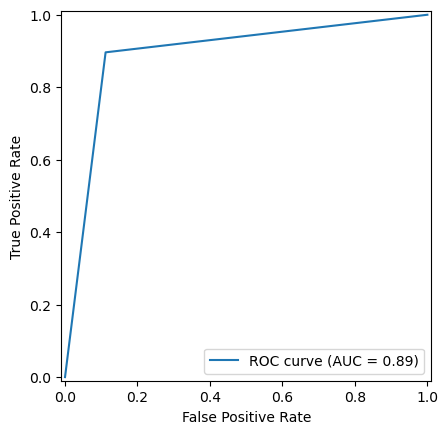

In [453]:
fpr, tpr, thresholds = metrics.roc_curve(test['y'], y_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

The ROC-curve shows how well the model correctly classifies something as positive or negative. In this case, whether or not a decision or not was made. 
It basically measures if a model has a lot of false positives or false negatives. Some cases can have a higher tolerance for false positives, but no tolerance for false negatives or vice versa and it all depends on the context.


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [99]:
import pandas as pd
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')
X = train.drop(columns=['target'])
y = train['target']
X_test = test.drop(columns=['target'])
y_test = test['target']

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [108]:
clf = DecisionTreeClassifier(max_depth=6, criterion='entropy',random_state=0, max_features=4)
clf.fit(X, y)
y_hat = clf.predict(X)

acc_train = clf.score(X, y)
print("Training set accuracy for tree classifier:", acc_train)


Training set accuracy for tree classifier: 0.820875


In [109]:
acc_test = clf.score(X_test, y_test)
print("Testing set accuracy: ", acc_test)

Testing set accuracy:  0.8125


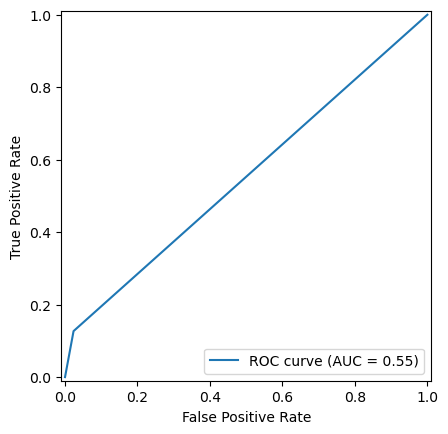

In [110]:
y_test_pred = clf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Testing set accuracy:  0.808


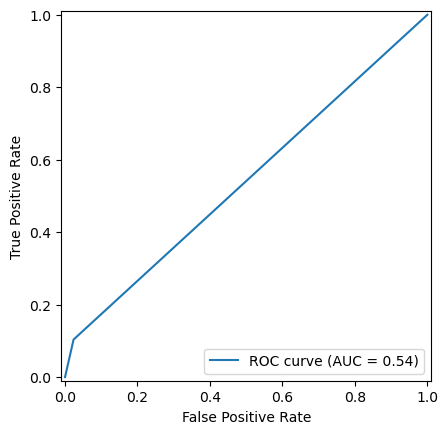

In [477]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='log_loss', min_samples_split=4, random_state=0)
rfc.fit(X, y)
acc_test = rfc.score(X_test, y_test)
print("Testing set accuracy: ", acc_test)

y_test_pred = rfc.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()



## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [478]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

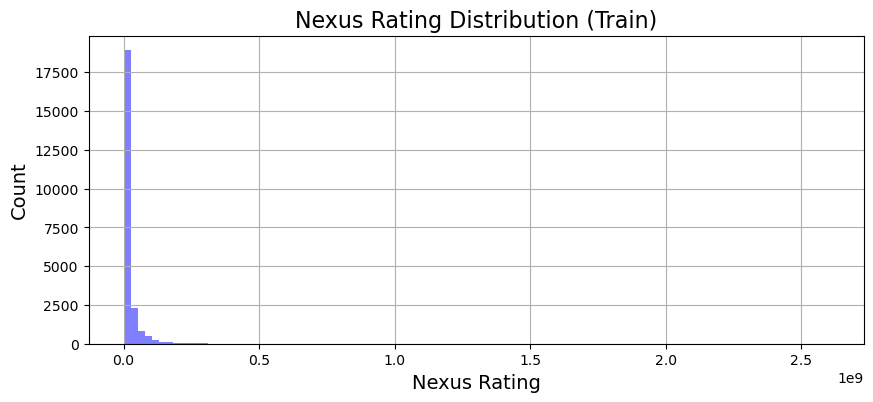

In [479]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [ ]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
#example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)